## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

## Prepare Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


## Create Model

In [3]:
num_classes = 10
img_height = 28
img_width = 28

Create_model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

## Compile Model

In [4]:
Create_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
Create_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          9

## Train Model

In [11]:
epochs = 10
history = Create_model.fit(
  train_images, 
  train_labels,
  epochs = epochs
)

Epoch 1/10


1875/1875 [==============================] - 21s 11ms/step - loss: 0.1347 - accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0444 - accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0322 - accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0257 - accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0219 - accuracy: 0.9928
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0179 - accuracy: 0.9947
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0159 - accuracy: 0.9951
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0132 - accuracy: 0.9960
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0117 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 38s 2

## Visualize Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

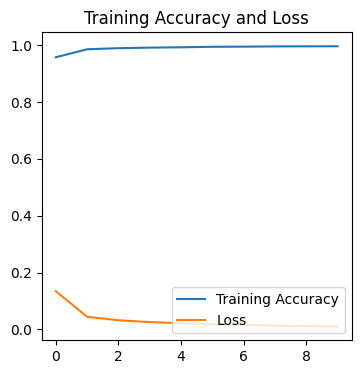

In [12]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(4, 4))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')


## Test Image

Prediction of model: [1.0000000e+00 6.3638954e-04 1.9098820e-02 7.7240846e-05 4.3421017e-04
 4.2332835e-05 9.9988592e-01 2.1720091e-06 7.6653896e-06 1.0123128e-01]
prediction is  [0]


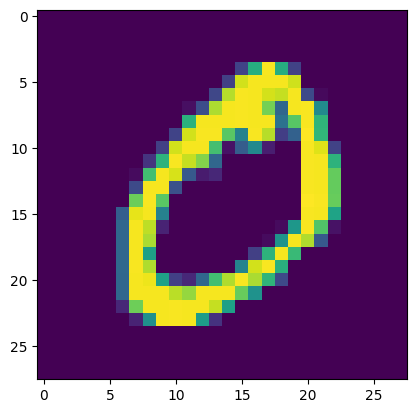

In [13]:
image = (train_images[1]).reshape(1,28,28,1)
model_pred = Create_model.predict(image, verbose=0)
classes_x=np.argmax(model_pred,axis=1)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))
print('prediction is ',  classes_x)

Prediction of model: [4.9709300e-08 5.4282110e-02 7.8194877e-05 3.9780940e-10 1.0000000e+00
 7.5250092e-08 2.2114379e-07 9.4656551e-01 9.4714918e-04 9.9957204e-01]
prediction is  [4]


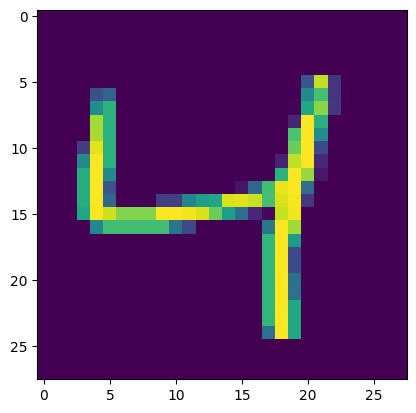

In [14]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = Create_model.predict(image, verbose=0)
classes_x=np.argmax(model_pred,axis=1)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))
print('prediction is ',  classes_x)

## Test Multiple Image

Test images array shape: (4, 28, 28)
Predicted digit: {} [8]
Predicted digit: {} [7]
Predicted digit: {} [3]
Predicted digit: {} [9]


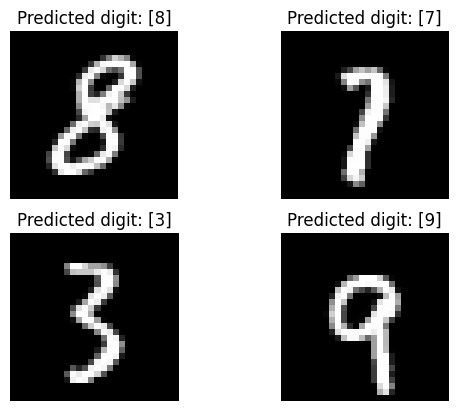

In [15]:

images = test_images[110:114]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = Create_model.predict(test_image, verbose=0)
    classes_x=np.argmax(prediction,axis=1)

    print ("Predicted digit: {}", classes_x)
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(classes_x))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()


## Save Model

In [15]:
Create_model.save("tensorflow-cnn-model.h5")

## Prediction using MATLAB

  18x1 Layer array with layers:

     1   'conv2d_input'                  Image Input             28x28x1 images
     2   'conv2d'                        2-D Convolution         64 3x3x1 convolutions with stride [1  1] and padding [0  0  0  0]
     3   'conv2d_relu'                   ReLU                    ReLU
     4   'conv2d_1'                      2-D Convolution         32 3x3x64 convolutions with stride [1  1] and padding 'same'
     5   'conv2d_1_relu'                 ReLU                    ReLU
     6   'max_pooling2d'                 2-D Max Pooling         2x2 max pooling with stride [2  2] and padding [0  0  0  0]
     7   'conv2d_2'                      2-D Convolution         16 3x3x32 convolutions with stride [1  1] and padding 'same'
     8   'conv2d_2_relu'                 ReLU                    ReLU
     9   'max_pooling2d_1'               2-D Max Pooling         2x2 max pooling with stride [2  2] and padding [0  0  0  0]
    10   'conv2d_3'                      2-D

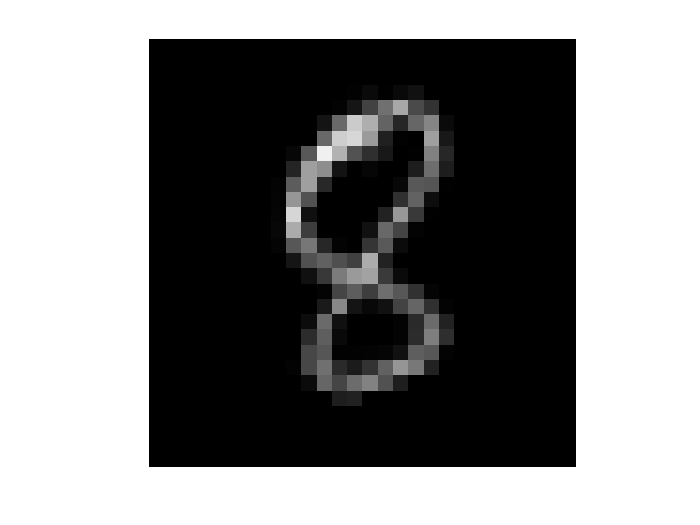

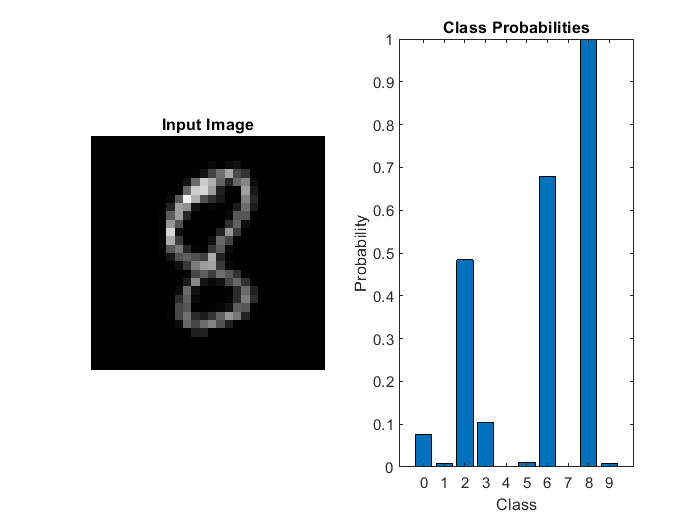

Predicted Class: 8


In [1]:
% Load the Keras model
kerasModel = importKerasNetwork('tensorflow-cnn-model.h5');

% Display the architecture of the loaded model
disp(kerasModel.Layers);

% Create a digitDatastore for the MNIST dataset
digitData = digitDatastore;

% Get the number of images in the datastore
numImages = numel(digitData.Files);

% Generate a random index
randomIndex = randperm(numImages, 1);

% Read the random image and its label
[randomImage, randomLabel] = readimage(digitData, randomIndex);

% Display the random image
figure;
imshow(randomImage);

% Resize or reshape the image to have a size of [28 28]
testImage = imresize(randomImage, [28, 28]);

% Convert image to grayscale if it's not already
if size(testImage, 3) == 3
    testImage = rgb2gray(testImage);
end

% Convert image to double and normalize
testImage = im2double(testImage);
testImage = testImage / max(testImage(:));

% Reshape the image to match the input shape expected by the model
testImage = reshape(testImage, [28, 28, 1]);

% Make predictions using the loaded model
predictions = predict(kerasModel, testImage);

% Display the input image
figure;
subplot(1, 2, 1);
imshow(randomImage);
title('Input Image');

% Display the predicted class
subplot(1, 2, 2);
bar(0:length(predictions)-1, predictions);
xlabel('Class');
ylabel('Probability');
title('Class Probabilities');

[~, predictedClass] = max(predictions);
disp(['Predicted Class: ', num2str(predictedClass-1)]); % Subtract 1 because classes are zero-indexed



